Observation of the data

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

Import of the raw data

In [291]:
test_data = pd.DataFrame(pd.read_csv("2023-07-17-1505-PreTest-Scores.csv"))
prof_data = pd.DataFrame(pd.read_csv("2023-07-17-1505-PreTest+ParticipantInfo.csv"))

game_data = pd.DataFrame(pd.read_csv("2023-07-17-1505-Game-ExtractedVariables.csv"))
game_txt_data = pd.DataFrame(pd.read_csv("2023-07-17-1505-Game-TextCoding.csv"))

end_answer_data = pd.DataFrame(pd.read_csv("2023-07-17-1505-PostTest.csv"))
end_txt_data = pd.DataFrame(pd.read_csv("2023-07-17-1505-PostTest-TextCoding.csv"))

1. Can the game be used to develop the ethical sensitivity of students in 
the domain of Machine Learning?


1.1 Dataset creation

In [235]:
d_profile = pd.DataFrame({'group':prof_data['Group'] , 'gender':prof_data['StrataGender'], 'age':prof_data['pre_Age'], 'uni':prof_data['StrataUniv'], 'level':prof_data['StrataLevel'], 'ml':prof_data['MLScore_weighted'], 'ethics':prof_data['EthicsScore_weighted'], 'IPMQ':test_data['IPMQ-Score-scaled'], 'IRI':test_data['IRI-Score-scaled']})
d_profile = pd.get_dummies(d_profile)

d_decisions = pd.DataFrame({'accept':game_data['menu1_answer'], 'jail_data': game_data['menu2_answer'], 'loop': game_data['looped'], 'translate_data':game_data['menu3_answer']})
d_decisions.loop = d_decisions.loop.replace({'STRAIGHT': False, 'LOOPED': True})
d_decisions = d_decisions.replace({'0$1': 0, '0$0': 0, '0$1$0': 0,  '1$0': 1, '1$0$1': 1, '0': 0, '1': 1})
d_decisions = d_decisions.replace({1: True, 0: False})

d_prof_dec = pd.concat([d_profile, d_decisions], axis=1)

d_result_themes = end_txt_data.drop(columns=['ID', 'Group', 'post_Learned', 'Not_coded'])
d_result_themes

,Bias_fairness_discrimination,Accuracy,Dilemma_Tradeoff_bias_accuracy,Choice_of_data,Quantity_of_data,Ethical_ML_AI,Appropriateness_of_AI,General_ML,General_ethics_ethics_of_tech,Expertise_and_information,...,Errors_faultiness,Role_of_computer_scientists,Decision_making,Metacognitive_how_to_make_decisions_or_how_to_learn,Management_and_leadership,Money,Personal_attitude,Emotional_reaction,Game,Already_know
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
270,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
from sklearn.preprocessing import OneHotEncoder

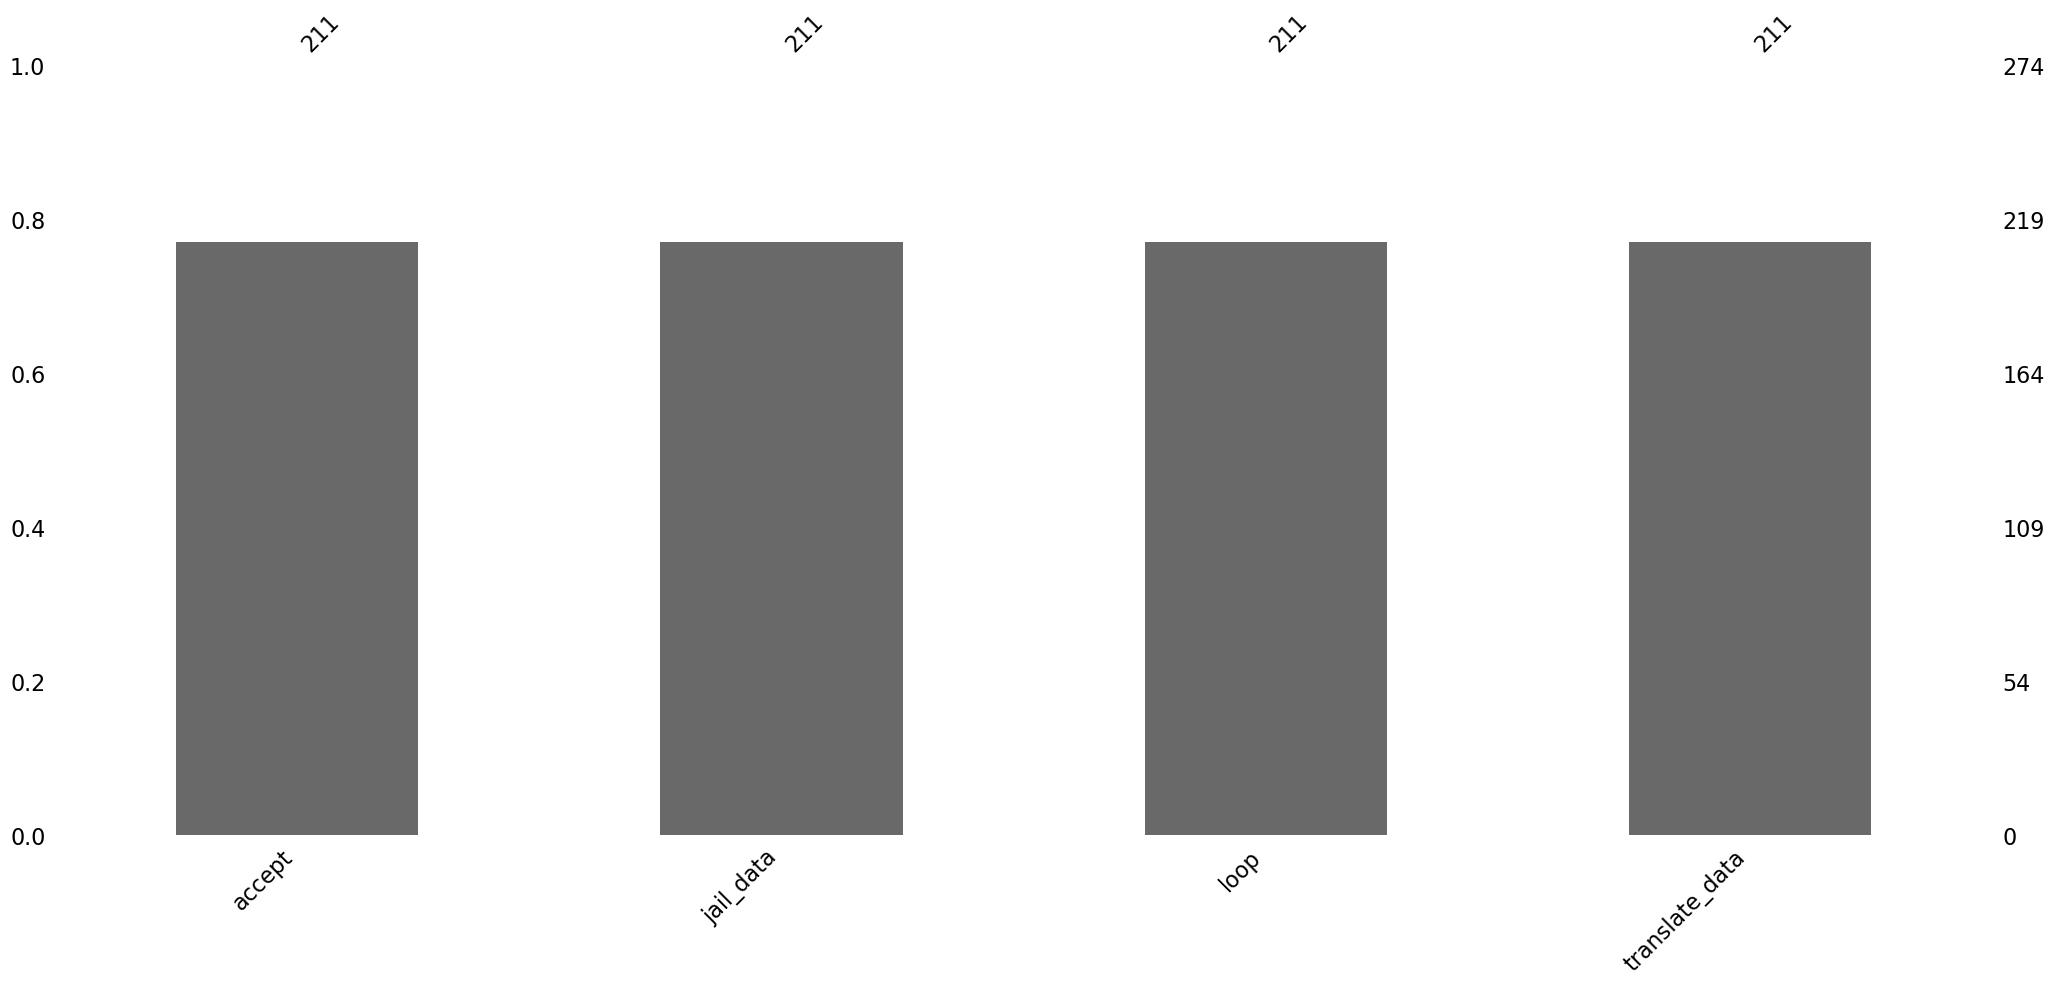

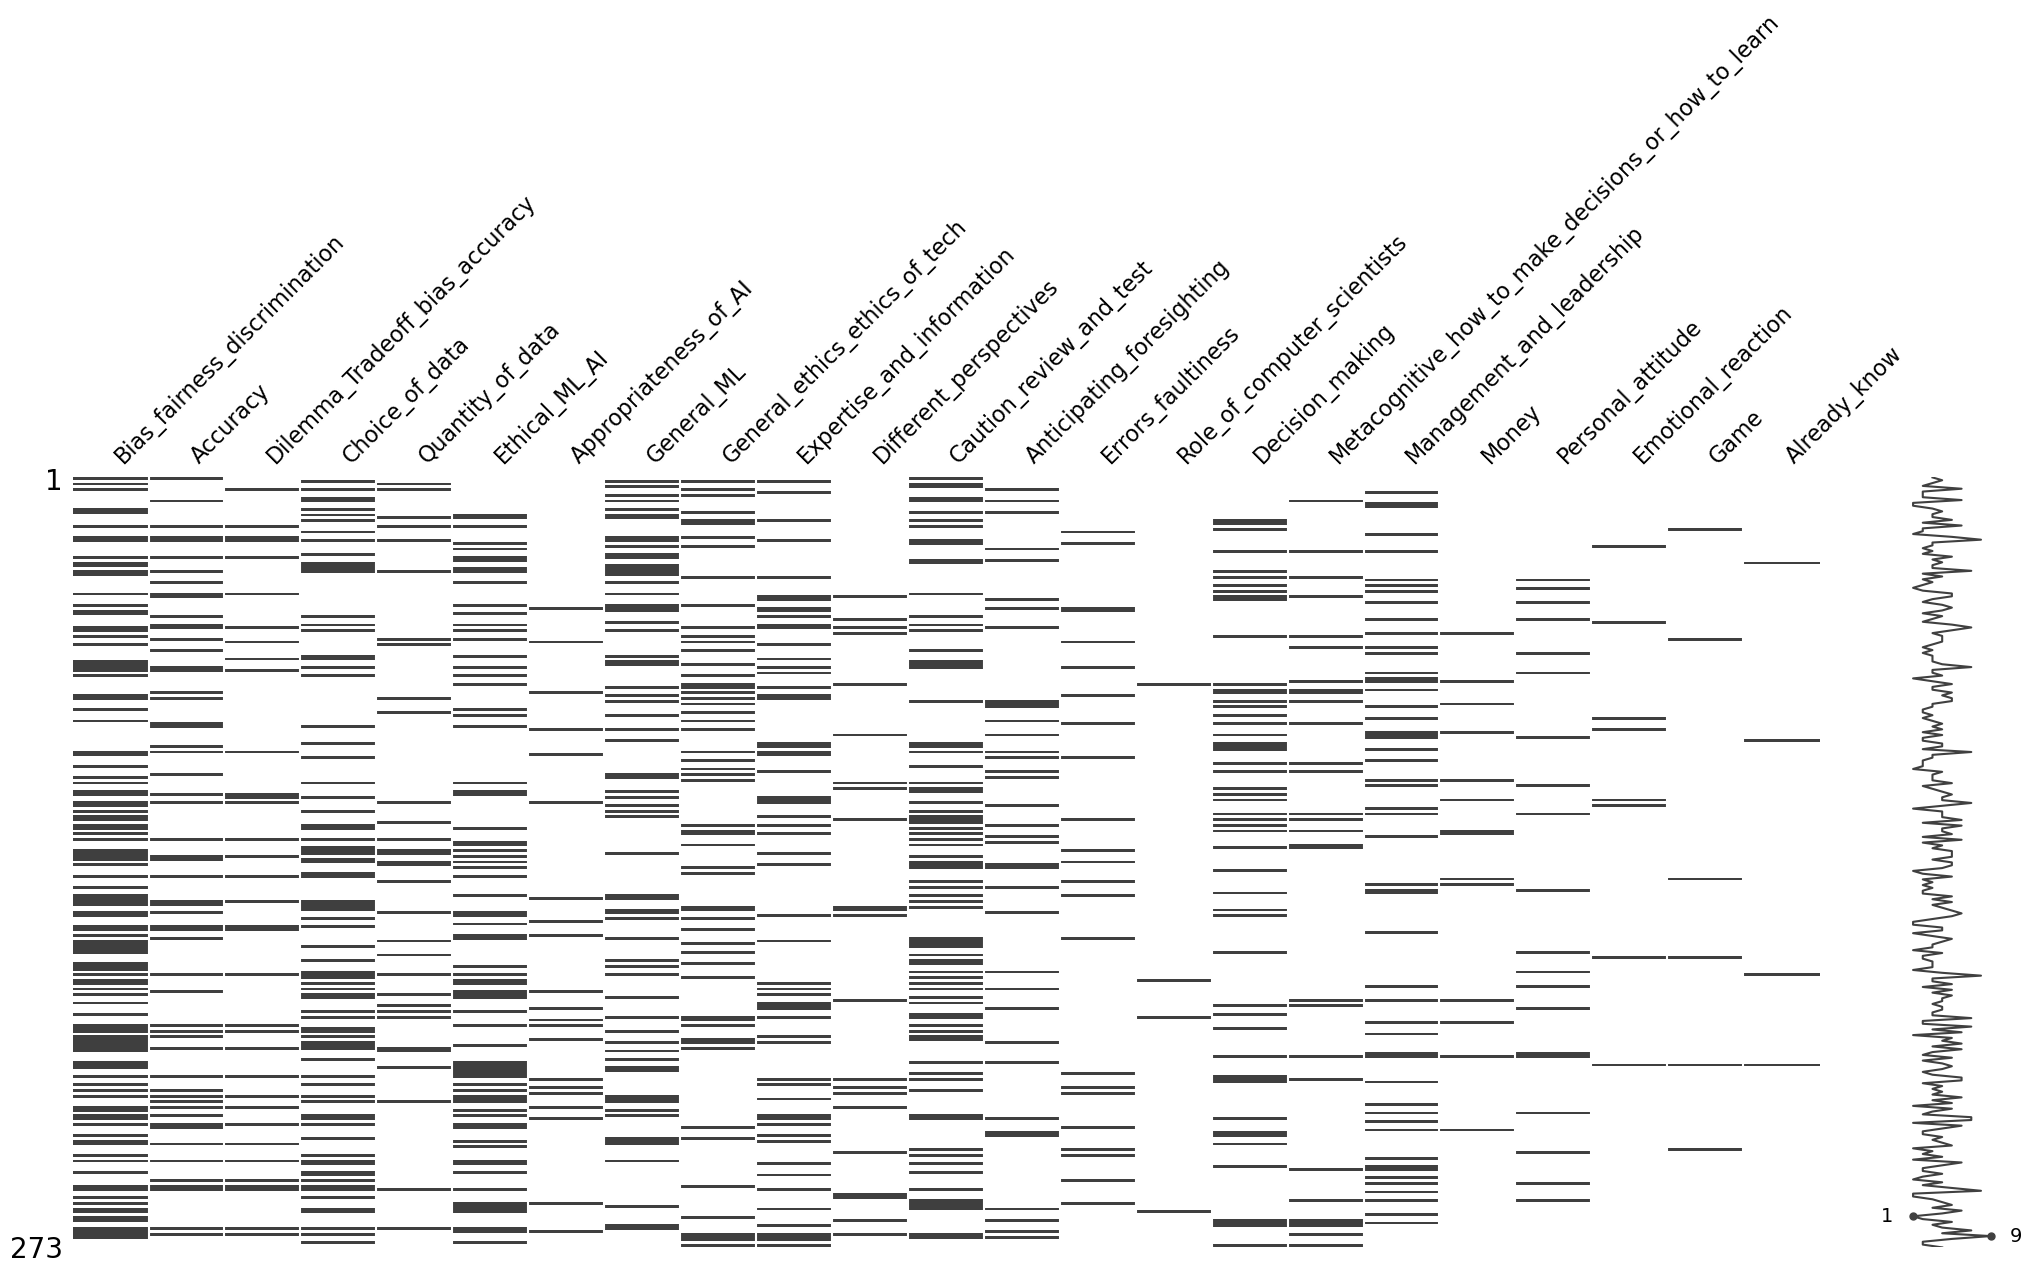

,ID,Group,jail_email,jail_reflection,Empty,Bias_fairness_discrimination,Accuracy,Dilemma_Tradeoff_bias_accuracy,Choice_of_data,Quantity_of_data,...,Decision_making,Metacognitive_how_to_make_decisions_or_how_to_learn,Management_and_leadership,Money,Personal_attitude,Emotional_reaction,Game,Already_know,I_was_right_wrong,Not_coded
0,2689263cae954d2a9cae81fec7062337,ExpReflection,pros: Taking into account the demographic data...,I think that for the first cases studied by th...,False,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,ee73ea357d624523b5bfd9946a84cdcd,ExpReflection,"Pros: the data will be more accurate, it will ...","Well, I was right. The machine learning tool i...",False,1.0,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,0cb6d474f0524645a832b8355af9322b,ExpReflection,Pros: the model will be more complete and it w...,I think that this decision was very difficult ...,False,NaN,NaN,NaN,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,a273fa0033774f9ca784d74beedf62ff,ExpReflection,- We could see if the foreigners commit more c...,I think that all the info including the demogr...,False,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fa9bd521e65c47f48d503c9b9f703ead,ExpNoReflection,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,5f277420394645ef806ab43831df999f,ExpReflection,I think that it may not be ethical to include ...,I think it is really difficult to decide wheth...,False,1.0,NaN,NaN,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
270,c1e3b3b6f19e4273874493f8f8eab1b0,ExpReflection,These data could help to have statistics or ma...,I think that demographic data could be integra...,False,1.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,b693a6e92c3442af85ba99a022cd95f1,ExpReflection,discrimination but also statistics,"My reasoning was correct. Indeed, my friend wa...",False,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
272,92d076fcd5914dcc99624891fe6c5270,ExpReflection,Cons: biased by the set of population availabl...,I think that both choices may eventually give ...,False,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


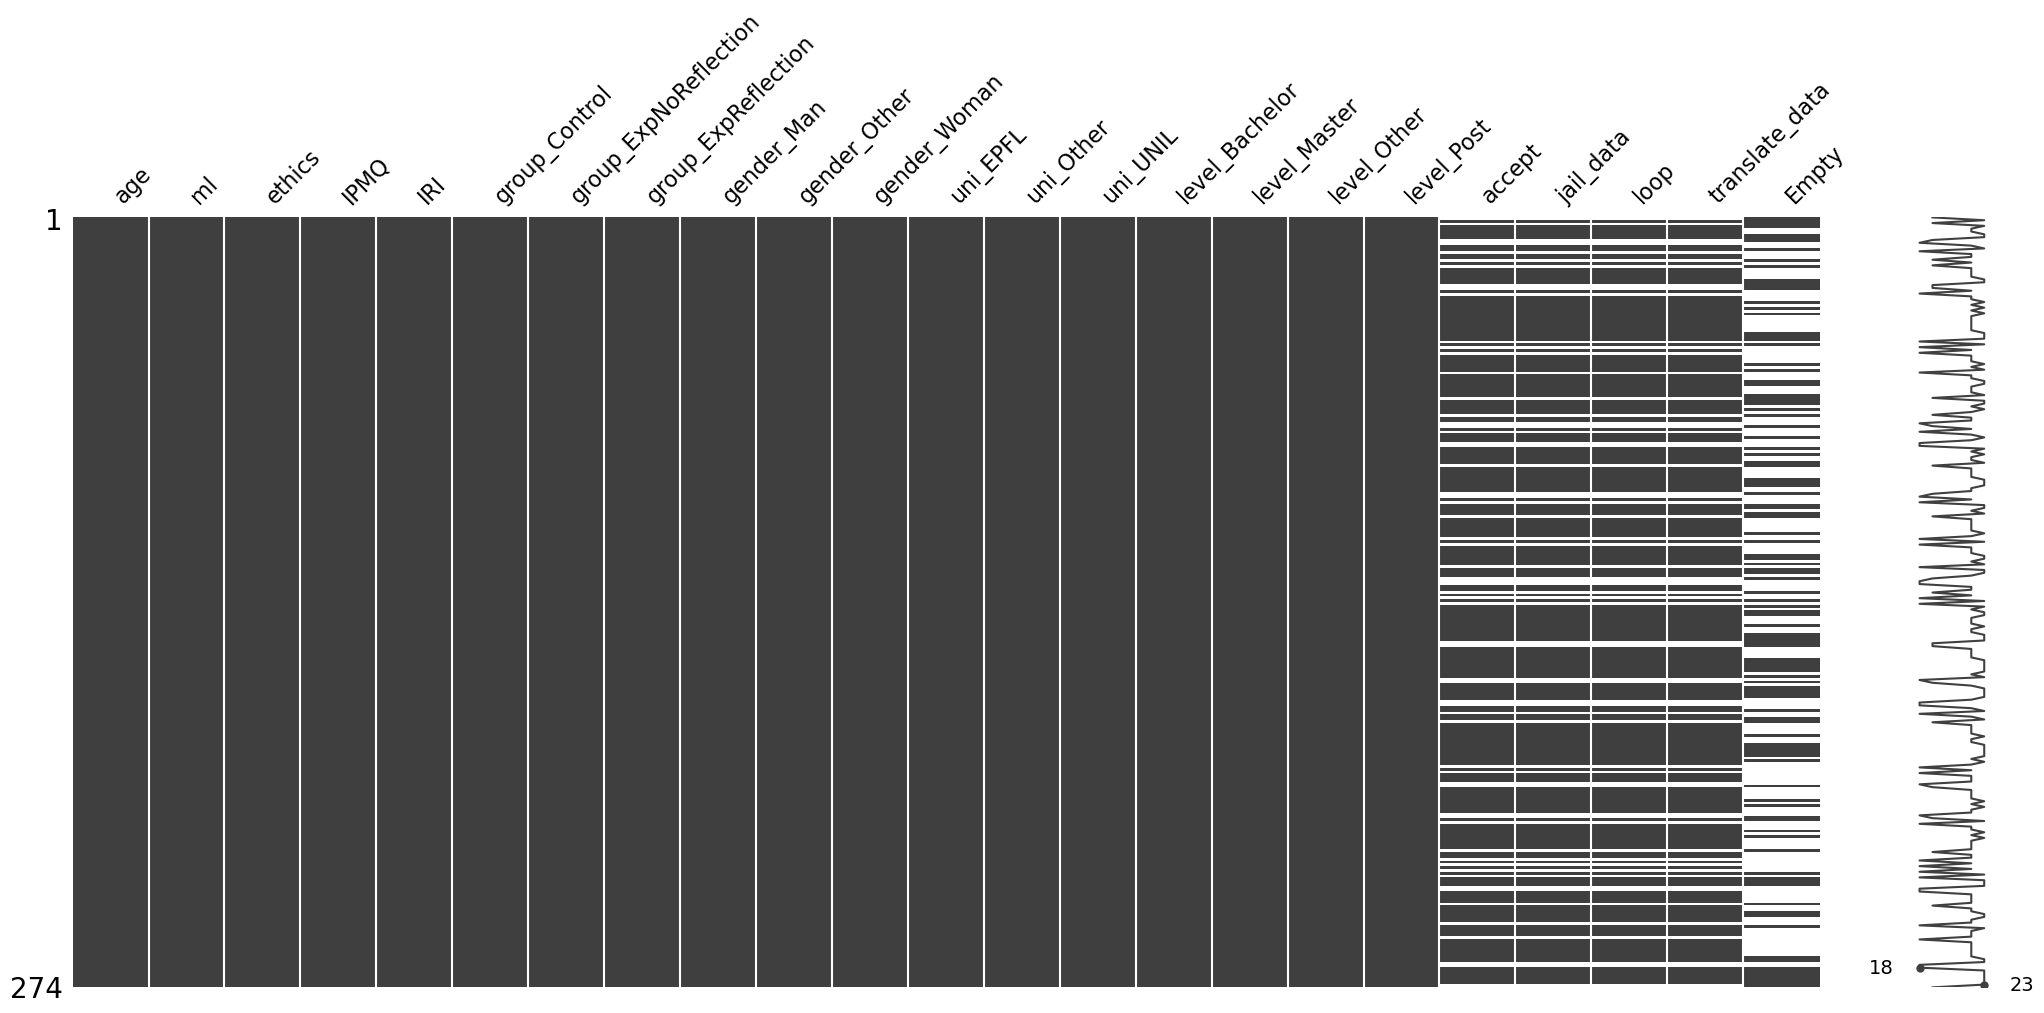

In [305]:
#missing values
msno.bar(d_decisions)
plt.show()
msno.matrix(d_result_themes)
plt.show()

#only missing values for the decisions, if we drop we still have ~80% of the data
d_prof_dec = d_prof_dec.dropna()

#no missing entry, replace then the NaN with 0 for more simplicity
d_result_themes = d_result_themes.dropna(how='all') 
d_result_themes.fillna(0)


all = pd.concat([d_profile, d_decisions, game_txt_data['Empty'].replace({True: np.nan})], axis=1)
msno.matrix(all)

game_txt_data


0      False
1      False
2      False
3      False
4        NaN
       ...  
269    False
270    False
271    False
272    False
273    False
Name: Empty, Length: 274, dtype: object

0      4.0
1      4.0
2      3.0
3      3.0
4      6.0
      ... 
269    9.0
270    5.0
271    3.0
272    2.0
273    4.0
Length: 274, dtype: float64


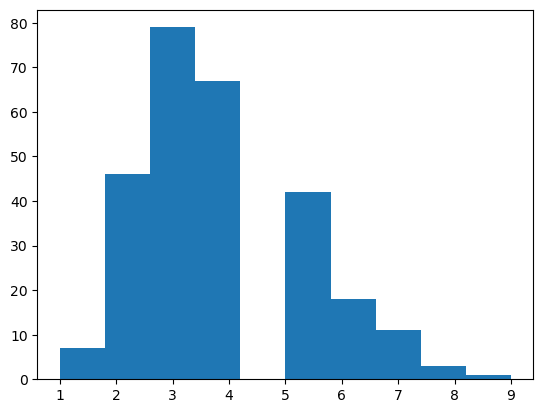

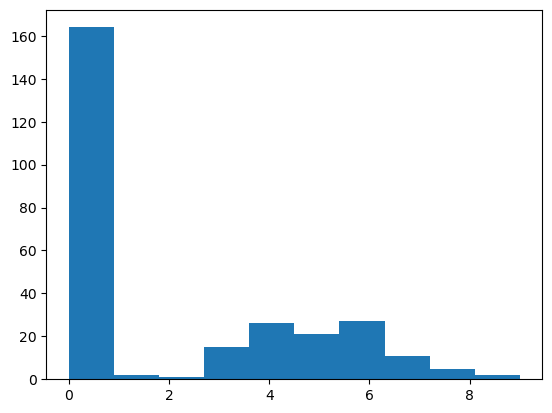

164


In [304]:
print(end_txt_data.drop(columns=['ID', 'Group', 'post_Learned']).sum(axis=1))
plt.hist(end_txt_data.drop(columns=['ID', 'Group', 'post_Learned']).sum(axis=1)
)
plt.show()
plt.hist(game_txt_data.drop(columns=['ID', 'Group', 'jail_email', 'jail_reflection', 'Empty']).sum(axis=1)
)
plt.show()
print(game_txt_data['Empty'].sum())